In [64]:
from ultralytics.models.sam import SAM
from ultralytics.models.fastsam import FastSAM
from PIL import Image
from ultralytics.utils.plotting import Annotator
import matplotlib.pyplot as plt
from ultralytics.models.sam import SAM3SemanticPredictor
import numpy as np
import torch
import torch.nn as nn
import cv2

In [37]:
img_path = "../data/dummy_selfie.png"
bbox = [501.4826,  188.8253,  706.8513,  493.8286]

Model summary: 178 layers, 93,735,472 parameters, 93,735,472 gradients
(178, 93735472, 93735472, 0.0)

image 1/1 c:\Users\zeyad\Desktop\Workspace\Vandalizer\notebooks\..\data\dummy_selfie.png: 1024x1024 1 0, 15733.9ms
Speed: 17.6ms preprocess, 15733.9ms inference, 25.4ms postprocess per image at shape (1, 3, 1024, 1024)


(np.float64(-0.5), np.float64(1183.5), np.float64(789.5), np.float64(-0.5))

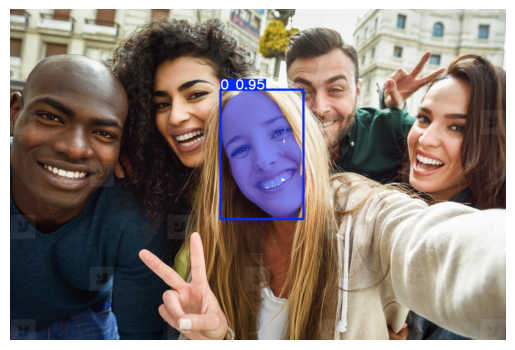

In [115]:
# Original sam guy
model = SAM("sam_b.pt")
print(model.info())

results = model(img_path, bboxes=bbox)
img = results[0].plot()
plt.imshow(img[:, :, ::-1])
plt.axis("off")

YOLOv8s-seg summary: 151 layers, 11,790,483 parameters, 0 gradients, 40.2 GFLOPs
(151, 11790483, 0, 40.174131200000005)

image 1/1 c:\Users\zeyad\Desktop\Workspace\Vandalizer\notebooks\..\data\dummy_selfie.png: 448x640 1 object, 409.3ms
Speed: 6.3ms preprocess, 409.3ms inference, 1130.3ms postprocess per image at shape (1, 3, 448, 640)


(np.float64(-0.5), np.float64(1183.5), np.float64(789.5), np.float64(-0.5))

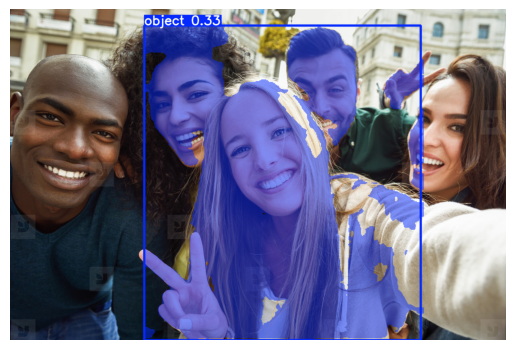

In [114]:
# fast sam guy
model = FastSAM("FastSAM-s.pt")
print(model.info())

results = model(img_path, bboxes=bbox)
img = results[0].plot()
plt.imshow(img[:, :, ::-1])
plt.axis("off")

In [75]:
mask = results[0].masks.data[0]
box_mask = np.zeros(img.shape[:-1])

xmin, ymin, xmax, ymax = [int(x) for x in bbox]
box_mask[ymin:ymax, xmin:xmax] = 1
box_mask = cv2.resize(box_mask, (mask.shape[1], mask.shape[0]), interpolation=cv2.INTER_NEAREST)



mask_filtered = mask * box_mask

C:\Users\zeyad\AppData\Local\Temp\ipykernel_6380\2335722607.py:10: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mask_filtered = mask * box_mask


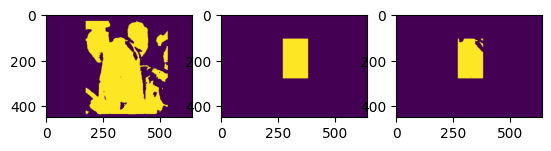

In [76]:
plt.subplot(231)
plt.imshow(mask)

plt.subplot(232)
plt.imshow(box_mask)

plt.subplot(233)
plt.imshow(mask_filtered)

(np.float64(-0.5), np.float64(1183.5), np.float64(789.5), np.float64(-0.5))

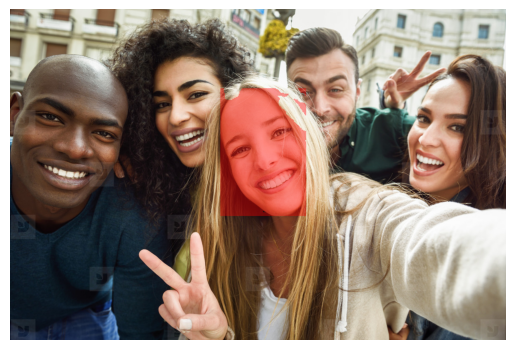

In [96]:
img = np.array(Image.open(img_path))
img_h, img_w = img.shape[:2]
mask_filtered_np = cv2.resize(mask_filtered.numpy(), (img_w, img_h), interpolation=cv2.INTER_NEAREST)
mask_filtered_np = (mask_filtered_np > 0).astype(np.bool)[None]

ann = Annotator(img.copy())
ann.masks(mask_filtered_np, colors=[(255,0,0)], alpha=0.4)  # batch dim required
out = ann.result()

plt.imshow(out)
plt.axis("off")

Model summary: 251 layers, 10,130,092 parameters, 10,130,092 gradients
(251, 10130092, 10130092, 0.0)

image 1/1 c:\Users\zeyad\Desktop\Workspace\Vandalizer\notebooks\..\data\dummy_selfie.png: 1024x1024 1 0, 1115.4ms
Speed: 18.0ms preprocess, 1115.4ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


(np.float64(-0.5), np.float64(1183.5), np.float64(789.5), np.float64(-0.5))

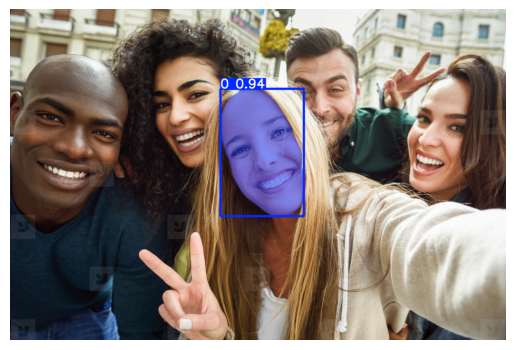

In [113]:
# Mobile SAM
model = SAM("mobile_sam.pt")
print(model.info())

results = model(img_path, bboxes=bbox)
img = results[0].plot()
plt.imshow(img[:, :, ::-1])
plt.axis("off")